In [81]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk

In [89]:
MNIST = pd.read_csv('train.csv')

features = MNIST.iloc[:3000,1:].values.reshape((3000,-1))

labels = MNIST.iloc[:3000,0].values.reshape(3000)

train,test,train_labels,test_labels = train_test_split(features,
                                                       labels,
                                                       test_size = 1/3,
                                                       random_state = 0,
                                                       shuffle = True)
train = normalize(train)

clf = MLPClassifier(hidden_layer_sizes = (200,200,200))

In [90]:
def confusion_image(trained_estimator, 
                    test_data, 
                    test_labels,
                    return_type = 'image'):
    
    confidence = trained_estimator.predict_proba(test_data)
    predicted_labels = trained_estimator.predict(test_data)
    
    d = {'Confidence': np.amax(confidence,1), 'Predicted Label': predicted_labels, 'True Label':test_labels}

    df = pd.DataFrame(data=d)
    
    dimensions = len(set(test_labels)),len(set(test_labels))
    
    a = np.zeros(dimensions)
    b = np.zeros(dimensions)
    for i in range(len(set(test_labels))):
        for j in range(len(set(test_labels))):
            a[i][j] = np.mean(df[(df['Predicted Label'] == i) & (df['True Label'] == j)])[0]
            b[i][j] = round(len(df[(df['Predicted Label'] == i) & (df['True Label'] == j)])/len(df)*100,2)
    
    if return_type == 'image':
        plt.figure(figsize=(8, 8))
        image = sns.heatmap(a.T,cmap = 'viridis', annot = b.T, fmt='1', cbar_kws = {'label': 'Confidence'})
        image.set(ylabel = 'True Label', xlabel = 'Predicted Label') 
        sns.set(font_scale = 1.3)
        return image
    
    elif return_type == 'counts':
        return pd.DataFrame(b.T)
    
    elif return_type == 'confidence':
        return pd.DataFrame(a.T)


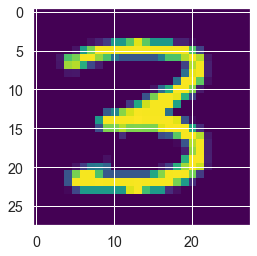

In [91]:
plt.imshow(((test[0]).reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

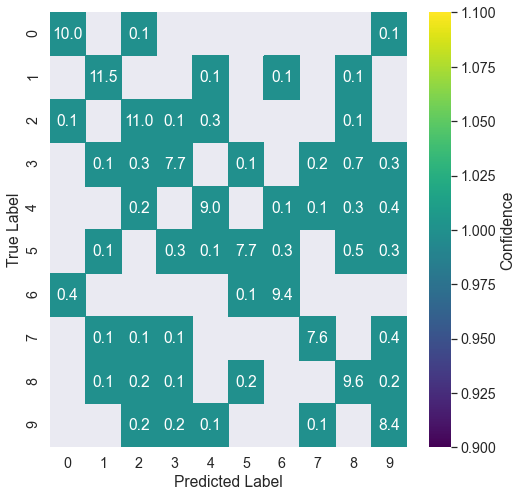

In [95]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test, test_labels)

In [96]:
test_10 = test.copy()

In [103]:
noisy_test = test_10[0].copy()
for i in range(len(test_10[0])):
    noisy_test[i] = np.random.normal(test_10[0][i],10)

noisy_test.reshape(-1, 1)
noisy_test = normalize(noisy_test,axis = 0) 
plt.imshow(noisy_test)
plt.colorbar()

ValueError: Expected 2D array, got 1D array instead:
array=[  8. -10.  23.  -2.  -2.   1.  -2.  16.  -4.   4.   0.  15.  -2.  -6.
 -18. -10.   6. -16.   6. -10.   5.   5.   0.  25.  14.   9.   5. -13.
   4.   8. -16.   9.  -4.   7.  18. -25.  11.  18.   2.   8.  -2.   6.
 -15.   8.   8.  -5.   3.  -4.  10.   0.  -6.  -6.   0.   2.   0.   0.
  -6.  -7.  12.  -4.   2.   8.  -4.  21.   7.   9.  -6.   3.  -4.  10.
  -1.  -6.  16. -19.   2.   0.   4.   2.   0.   0.   9.   3.   9.   7.
  14.   9.   6.  -4. -12. -12.   4.   2.   3.  10.  -1.  -1.   7.   2.
 -15.  10.  -4.  14.   3.   8.  -7. -12. -15.  -4.   0.   8.  -3.  16.
  -6.  -6.  -3.   1.  -4.  28. -11.  -5.  29.  41. 152. 157. 181. 239.
 183. 120. 138. 134.  22.  30.   8.  -2.  -3.  -4.   0.   7.  14.  11.
   3.   6.   0.  -2.   8.   6. 130. 198. 268. 256. 256. 230. 245. 247.
 250. 259. 242. 273. 267. 255. 191.  54.  -3.   5.  10. -11.   2.  17.
 -10.   9.   1.  16. 176. 209. 252. 259. 209. 191.  82.  49.  58.  46.
  93.  57. 115. 191. 183. 228. 263. 222.  18.  -2.  -4. -10.   2.  -8.
  -8.  -7.  -4.  27. 208. 233. 156.  39.  24.  -2.   0.  -1.   6.  13.
   4. -16.   6.   0.  11.  43. 216. 233.  22.   0.  -9.   4. -12.   5.
  25.  -2.  15.  12.  18.  17.   0.   7.   5.   5.  -7.  -5.   3. -15.
  -8.   0.  -4.  -7.  -9.  79. 249. 251.  15.  -5.   0.   6.  -5.  -5.
   1.   3. -12.  -3.   2.   1.  15.  14.   2. -20.  -2.  14.  -7.   9.
   5.   6.  -1.   5. 109. 254. 258. 191.   8.  -1.  -9.  -5.  -9.   3.
 -12.  -8.  13.   5.   2. -11.  -3.  11.  15.  -7.   0.  -8. -12.  16.
  19.   0.  90. 142. 247. 249. 207.  24.   4.   5.   3.  -8.   9.  -5.
   8.  -8.  -8.  16.   0.  10.   3.   0. -12.   0.   2.  21. -14.   4.
  54. 194. 254. 253. 262. 178.  48.  -6.  19. -13.  -6.  -3.   6. -20.
   0.  -9.   5.  -3.  12.   9.  13.   0.  -8.  -4.   9.  21.  38. 160.
 223. 268. 258. 258. 154.   4.   9.  12.  13. -13.  -9.  -3.   5.  12.
 -12. -11.  -3.  14.  -2. -14.  -4.  14.  -1.  72. 125. 211. 240. 256.
 266. 244. 241. 105.  -9.  -8.  -3.  -2. -11.  -3.  16.   3.   6.  -6.
   2. -23.  -6.  12.  -1.   3.  12. -18. 165. 248. 231. 258. 255. 251.
 260. 240. 252. 262. 237.  67.  23.   0.  -4. -23.   5.  -8.   1.   3.
   2.  -7.  20.   4.  11.  -1.  17.   2.  66. 197. 209. 240. 198. 211.
 198. 206. 250. 242. 254. 241. 150.  37.   7.   8.   2.   1.   6.  -4.
  -6.  -1.  -9.   3.   8.  12.  -2.   6.  -7.  11.  -1.  24. -18.  -4.
   6.  -2.  61.  67. 186. 260. 253. 214.  20.   9.   6.   0.  -7.   8.
   0.  -5.  -3.  -7.   6. -10.   0.   0. -11.  -1.  -3.  -4.   6.  11.
  -2.  -3.   2.  15.   0.  90. 232. 253.  15.  -3.  11.  -1.   7.  -9.
   3.  -1.  13.   6.  -1.  -5.  18.   8.  18.   3.   2.   5.  -6.  -9.
   3.   3.  35.  14.  -7.  11. 231. 258.  31.  -1.  -2.  -2.  -9.   5.
   2. -24.  18.  -1. -12.   0.   8.   9.   3.   0.  14.  12.   0.  -2.
  -7.   0.  -1.   6. -11. 143. 243. 256.  22.  -7.  -1.   6. -14.   8.
  14. -20.  -7.  24.  -7.  15.  45. 113. 107.  86.  -3.  -9.   0. -16.
   7.   2.  34.  49. 169. 217. 237. 266.  15.  -1. -17. -15.   0.   3.
  15.  -1. -16. -16.  57. 193. 247. 221. 192.  76.  63.  78.  52.  71.
  76. 161. 213. 259. 246. 252. 199.  47.  14. -12.   0.  14. -11.  27.
   1.   8. -18.  -7.  70. 258. 247. 243. 256. 258. 267. 249. 243. 246.
 228. 262. 264. 237. 224. 129.  36.   9.  -1.   5.  -6. -12.   7.  -3.
  29.  -5.   4.   3.  25.  46. 135. 127. 137. 142. 133. 145. 244. 244.
 174. 137. 136.  44.   9.  17.  -5.  -5. -16. -11.   7.  -3.   0.   2.
   5.  11.  -1.  -5.   6.  -3.  -6.  -1. -13.  -8.   1.  -2. -10.  -3.
  -3.  -2.  -2.  -7.  -1.   8. -16.  -6.  -4.  -3.   7.   8.   1.  16.
   1. -11.  -1. -10.   0.   1.   0. -12.   8.   8. -14.  11.  -2. -12.
 -10. -13. -16.   3.   2.  -6.   1.  -2.  -3.  14. -27.  -2.   4.  -3.
   0. -17.   0.   0.  -6. -11.   3.  -2.  -6.  -9.  19.   9. -10.   3.
 -12.  16.  -2.  11.  17.  -4.  -1.  -2.   3.  -6.  -7.  -1.  -5.  -1.
  -3.  -7.   6.  -6.  -2.  -1.  -5.  12.  13.  -7.  -5.   8.   4.  14.
   0.   9.   0.   2.  -9.  11. -19. -10.  -1. -10. -19.   8.   1.   0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

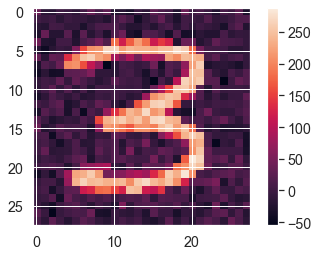

In [98]:
plt.imshow((test_10[0]+np.random.normal(0,20,784)).reshape(28,28))
plt.colorbar()

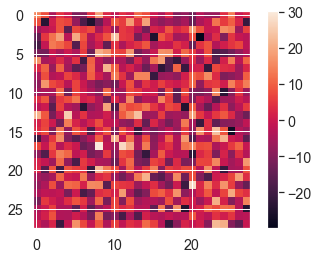

In [75]:
plt.imshow(np.random.normal(0,10,784).reshape(28,28))
plt.colorbar()

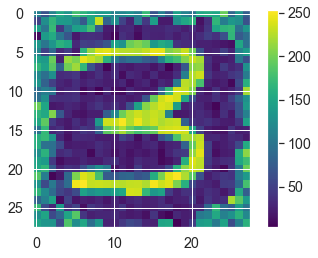

In [76]:
test_10 = test.copy()
for i in range(len(test_10)):
    test_10[i] = test_10[i] + np.random.normal(0,10,784)
test_10 = MinMaxScaler((0,255)).fit(test_10).transform(test_10)
plt.imshow((test_10[0].reshape((28,28))),cmap = 'viridis')
plt.colorbar()

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

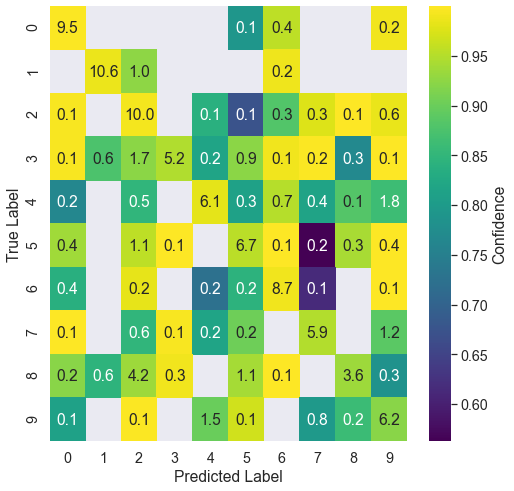

In [38]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_10, test_labels)

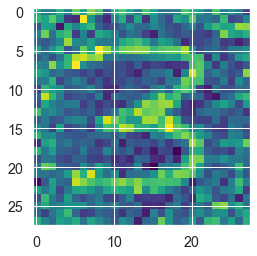

In [424]:
test_50 = test.copy()
#for i in test_50:
#    i+=np.random.randint(-50,50,784)
for i in range(len(test_50)):
    test_50[i] = test_50[i] + np.random.normal(0,50,784)
test_50 = MinMaxScaler((0,255)).fit(test_50).transform(test_50)
plt.imshow((test_50[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

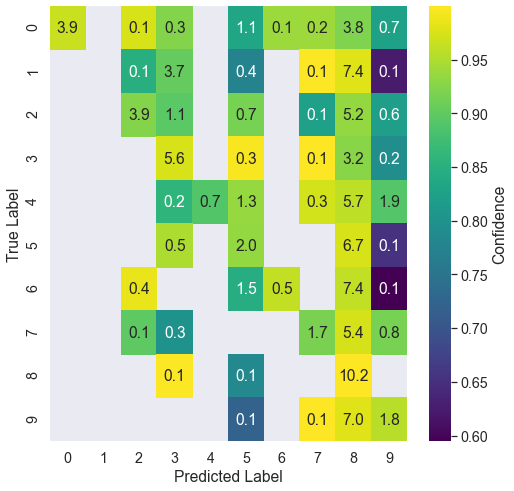

In [425]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_50, test_labels)

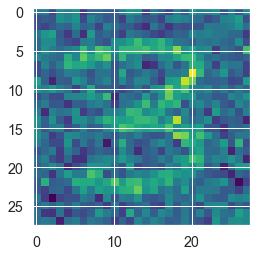

In [426]:
test_100 = test.copy()
#for i in test_100:
#    i+=np.random.randint(-100,100,784)
for i in range(len(test_100)):
    test_100[i] = test_100[i] + np.random.normal(0,100,784)
test_10 = MinMaxScaler((0,255)).fit(test_100).transform(test_100)
plt.imshow((test_100[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

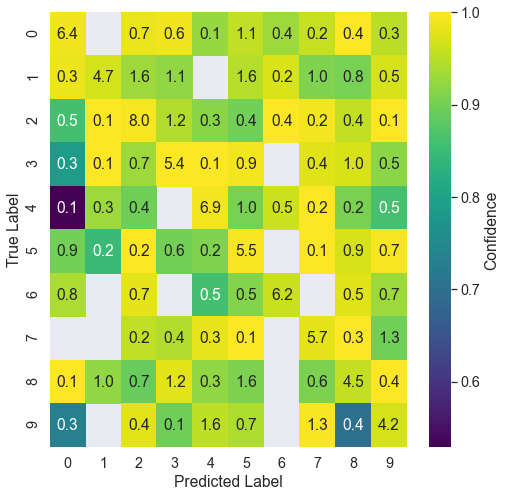

In [427]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_100, test_labels)

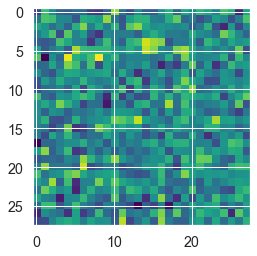

In [428]:
test_250 = test.copy()
#for i in test_250:
#    i+=np.random.randint(-250,250,784)
for i in range(len(test_250)):
    test_250[i] = test_250[i] + np.random.normal(0,250,784)
test_250 = MinMaxScaler((0,255)).fit(test_250).transform(test_250)
plt.imshow((test_250[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

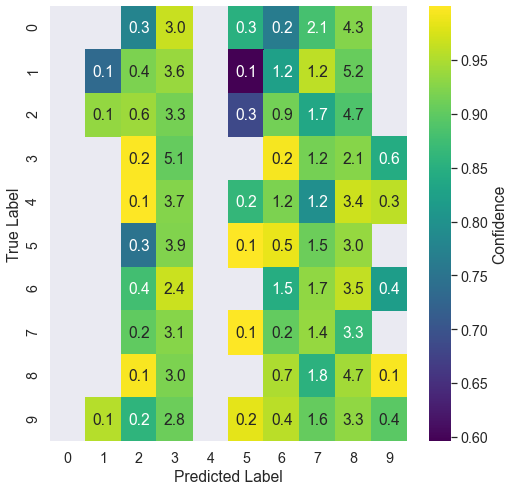

In [429]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_250, test_labels)

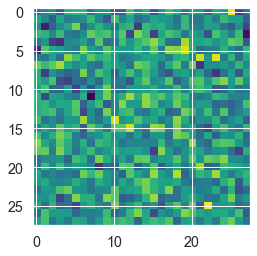

In [430]:
test_450 = test.copy()
#for i in test_450:
#    i+=np.random.randint(-450,450,784)
for i in range(len(test_450)):
    test_450[i] = test_450[i] + np.random.normal(0,450,784)
test_10 = MinMaxScaler((0,255)).fit(test_450).transform(test_450)
plt.imshow((test_450[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

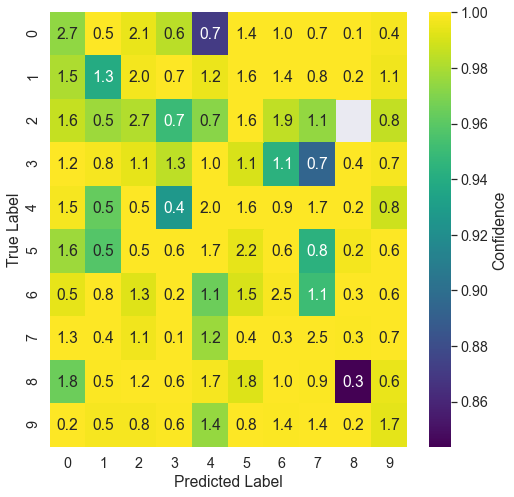

In [431]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_450, test_labels)

In [105]:
def plot_noise_to_confidence(trained_estimator,
                             test_data,
                             test_labels,
                             noise_range = [0]):
    x_axis = noise_range
    correct = []
    incorrect = []
    for i in noise_range:
        test_data_copy = test_data.copy()
        for j in range(len(test_data_copy)):
            if i == 0:
                pass
            else:
                test_data_copy[j] = test_data_copy[j] + np.random.normal(0,i,784)
                test_data_copy = MinMaxScaler((0,255)).fit(test_data_copy).transform(test_data_copy)
        
        data = confusion_image(trained_estimator, test_data_copy, test_labels, return_type = 'confidence')
        
        diag = list(np.diag(np.array(data)))
        
        data_copy = data.copy()
        np.fill_diagonal(data_copy.values, np.nan)
        rest = list(np.mean(data_copy))
        
        correct.append(diag)
        incorrect.append(rest)
        
    correct = np.array(correct)
    incorrect = np.array(incorrect)
    
    fig = plt.figure(figsize = (15,20))
    
    for i in range(10):
        ax = fig.add_subplot(5,2,i+1)   
        ax.plot(x_axis, correct[:,i], label = 'confidence of correct classification')
        ax.plot(x_axis, incorrect[:,i], label = 'mean confidence of incorrect classifications')
        ax.set_title('Class {}'.format(i))
        ax.set_xlabel('Noise Range')
        ax.set_ylabel('Confidence')
        ax.legend()
    plt.tight_layout() 

In [ ]:
plot_noise_to_confidence(trained_model, test, test_labels, list(np.arange(0,1000,25)))